In [85]:
# Bibliotheken laden
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Geometrische Lösung von DLGn 2. Ordnung
##### Notebook zum Abschnitt 7.2 MH2
(Thema am Ende aus Zeitgründen nicht gemacht)

Beispiel: Auto auf einem hügeligen Straße.

$a \equiv \pi \frac{H}{L m}$, wobei $L, H$ Länge und Höhe der Hügel sind, und $m$ die Masse des Autos
$b = r / m$ wobei $r$ Reibungskoeffizient.

$$\ddot x(t) = -a \sin(x(t)) - b \dot x(t)$$

Das entspricht dem Fadenpendel fuer grosse Winkel.

### 1. Numerische Lösung

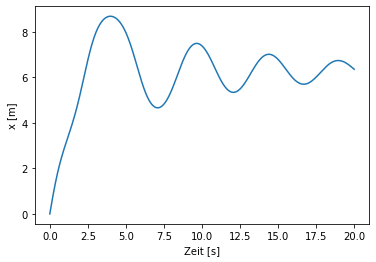

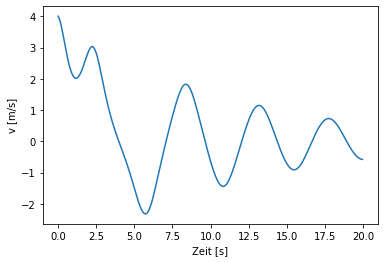

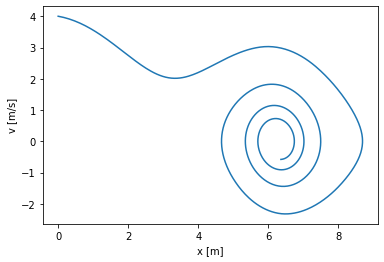

In [88]:
# Definiere Konstanten
a = 2
b = .2

# Definiere Anfangswert y0 und Entzeitpunkt T
x0 = 0 # Anfangsort in m
v0 = 4 # Anfangsgeschw. in m/s

T = 20 # Endzeitpunkt in s

# Definiere rechte Seite der DGL
def G(t, y):
    x, v = y # unpack y vector
    
    dx_dt = v
    dv_dt = -a * np.sin(x) - b * v
    
    ## alternativ: instead of sine, approx. rectangular profile
    #dv_dt = -b*v
    #for n in range(1,50): 
    #    dv_dt += np.sin(n*x)/n
    
    
    return [dx_dt, dv_dt]

# Löse DGL numerisch, zu bestimmten Anfangswert
# (d.h., löse Anfangswertproblem)
t_eval = np.linspace(0, T, 1000, endpoint=False)

solution = solve_ivp(G, [0, T], [x0, v0], t_eval=t_eval)
x_t = solution.y[0,:]
v_t = solution.y[1,:]

# Plotte Lösung
plt.plot(t_eval, x_t)
plt.xlabel('Zeit [s]')
plt.ylabel('x [m]')
plt.show()
plt.plot(t_eval, v_t)
plt.xlabel('Zeit [s]')
plt.ylabel('v [m/s]')
plt.show()
plt.plot(x_t, v_t)
plt.xlabel('x [m]')
plt.ylabel('v [m/s]')
plt.show()

### 2. Graphische Lösung

/Users/sauers/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


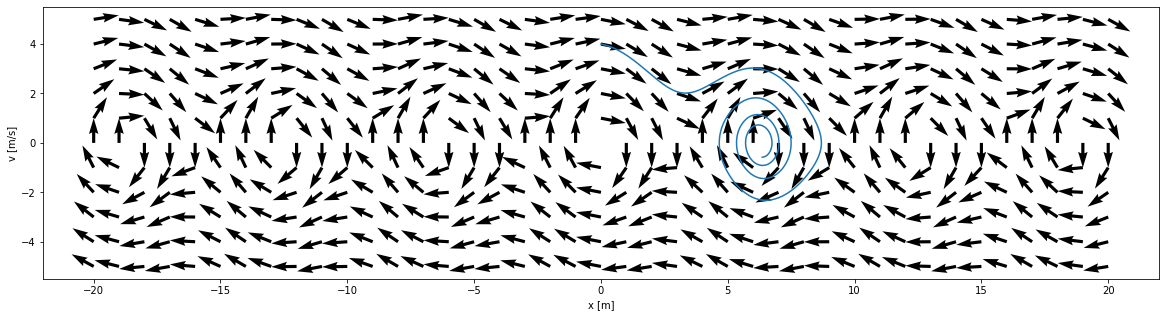

In [89]:
# Anzahl gezeichneter Pfeile (je in t- und y-Richtung)
N = 20

x_max = 20
v_max = 5
x_grid, v_grid = np.meshgrid(np.linspace(-x_max, +x_max, 2*N+1),np.linspace(-v_max, +v_max, np.int(2*N*v_max/x_max)+1))

G1_grid, G2_grid = G(0, [x_grid, v_grid])
#G1_grid = [G(0,[x,y]) for x in x_grid for y]
#G2_grid = []
l = np.sqrt(G1_grid**2 + G2_grid**2)

dt = 1.0*T/N

plt.figure(figsize=(x_max,v_max))
plt.quiver(x_grid, v_grid, G1_grid*dt/l, G2_grid*dt/l, angles='xy', scale_units='xy', scale=1)
plt.xlabel('x [m]')
plt.ylabel('v [m/s]')
plt.plot(x_t, v_t) # zeichne numerische Lösung hinzu
plt.show()